In [1]:
#Importing the dataset
import pandas as pd
import numpy as np


df = pd.read_csv('/content/housepricedata.csv')

In [2]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values

In [4]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [6]:
#Normalizing and Scaling the dataset are very important as there are no missing values in the dataset
#Normalization/Scaling makes input features to be on same order of magnitude
#Mim max scaler scales our data values to be between 0 and 1

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
#Data Splitting into Train, Validaion and Testing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [10]:
#Getting the rows of all Train, Validation and testing
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [11]:
#Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. 
#Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible

#We will be using Keras to build Neural Network architecture using TensorFlow backend
!pip install Keras

In [12]:
#We need Tensorflow as Keras uses Tensorflow as backend
!pip install tensorflow

In [13]:
#Importing required modules from Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [14]:
#Model 1: Sequential Model
#In Sequential Model, we need to describe the number of layers above in the sequence
# Here we used 2 Hidden layers with 30 neurons (ReLU activation), and 1 output layer with 1 neuron (Sigmoid function)

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#Now, we got our architecture specified- we need to configure the model 
#optimizer=sgd (Stochastic gradient descent)
#loss=binary_crossentropy (giving the type of loss function to use)
#metrics=accuracy (Other metrics which you want to check apart from loss function)

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


#Fitting the model
#epochs= tells how long we want to train the model

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 388us/step - loss: 0.7304 - accuracy: 0.5078 - val_loss: 0.7271 - val_accuracy: 0.4886
Epoch 2/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.7127 - accuracy: 0.5078 - val_loss: 0.7106 - val_accuracy: 0.4886
Epoch 3/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.7002 - accuracy: 0.5059 - val_loss: 0.6995 - val_accuracy: 0.4886
Epoch 4/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.6915 - accuracy: 0.5059 - val_loss: 0.6915 - val_accuracy: 0.4886
Epoch 5/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6850 - accuracy: 0.5049 - val_loss: 0.6852 - val_accuracy: 0.4886
Epoch 6/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6793 - accuracy: 0.5029 - val_loss: 0.6796 - val_accuracy: 0.5342
Epoch 7/100
1022/1022 [==============================] - 0s 47us/step - loss

In [15]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 64us/step


0.8630136847496033

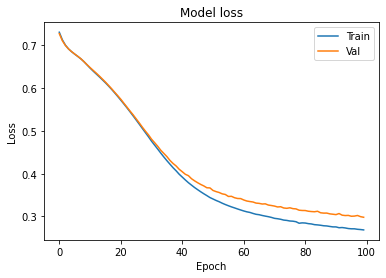

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

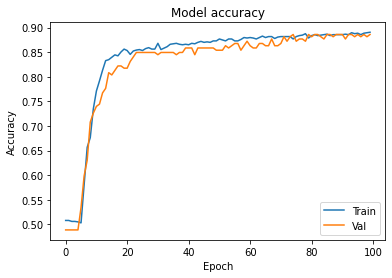

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
#Model 2: Training model with many hidden layers to check whether the model will overfit
#Purpose of this model is to built complex model that will overfit (Complex model is built with many hidden layers )

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4782 - accuracy: 0.7935 - val_loss: 0.3796 - val_accuracy: 0.8584
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3400 - accuracy: 0.8601 - val_loss: 0.3435 - val_accuracy: 0.8584
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3051 - accuracy: 0.8728 - val_loss: 0.2985 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3111 - accuracy: 0.8630 - val_loss: 0.3306 - val_accuracy: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2966 - accuracy: 0.8699 - val_loss: 0.3002 - val_accuracy: 0.8904
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2984 - accuracy: 0.8767 - val_loss: 0.3153 - val_accuracy: 0.8904
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2613

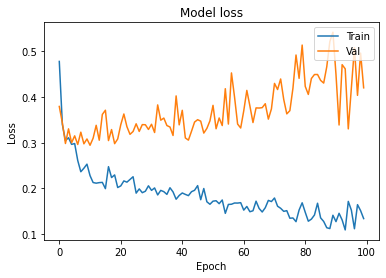

In [19]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

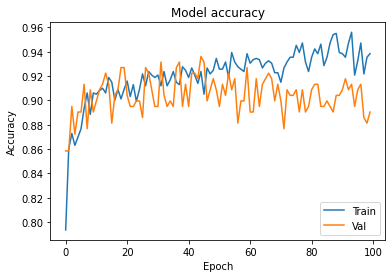

In [20]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#Now, you can see that Model 2 is over fitting when compared to Model 1 due to additional hidden layers added to Model 2 when compared to Model 1
#Overfitting is identified via Accuracy graph above where the Model performs very well on the Training data (with high accuracy) and performs worst on Validation data (with low accuracy when compared to Training data)

In [21]:
#Model 3: Adding L2 regularization to same paramaters given to Model 2 thereby reducing the Overfitting in Model 2.
#L2 regularization also referred to as Ridge regression
#Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function
#L2 Regularization adds the term Lambda and Lambda need to be choosen carefully.
#L2 regularization forces the weights to be small but does not make them zero and does non sparse solution.

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.7147 - accuracy: 0.7231 - val_loss: 4.0215 - val_accuracy: 0.8311
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7199 - accuracy: 0.8327 - val_loss: 0.6856 - val_accuracy: 0.8950
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5601 - accuracy: 0.8699 - val_loss: 0.5194 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4892 - accuracy: 0.8787 - val_loss: 0.5126 - val_accuracy: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.8601 - val_loss: 0.4815 - val_accuracy: 0.8950
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4984 - accuracy: 0.8571 - val_loss: 0.5201 - val_accuracy: 0.8630
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.491

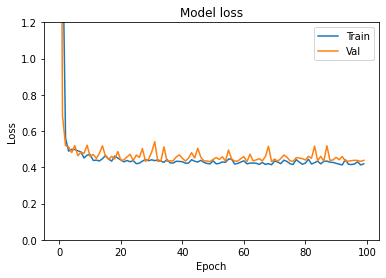

In [22]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
#As you can see that the Model 3 (With Regularization) is less overfitting when compared to Model 2 with many hidden layers (no regularization)
#There is no overfitting here as Training accuracy vs Validation data accuracy is very close 
#Regularization improves the performance of the models

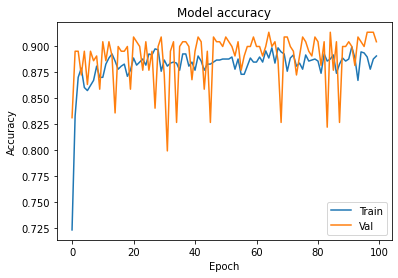

In [23]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()